# Filtrado de datos

Muchas veces no queremos realizar el analisis sobre todo el dataFrame, si no solo sobre una porcion. Para ello pandas nos permite realizar filtrados y proyecciones.

**Definición** Llamamos filtrado de un conjunto de datos all conjunto de datos resultante de aplicar ciertas restricciones a dicho conjunto. El conjunto de restricciones aplicadas se conoce como **filtro**.

**Definición** Llamamos proyección de un conjunto de datos al conjunto de datos resultante de eliminar algunas, pero no todas, las columnas del conjunto de datos.

Para ejemplificar esto, retomemos el dataset de `listings.csv` que contenía los datos de AirBNB.

In [ ]:
! gdown 114NGMor-dXs27ffKIJEfRVspxYQ3G_D_

Downloading...
From: https://drive.google.com/uc?id=114NGMor-dXs27ffKIJEfRVspxYQ3G_D_
To: /content/listings.csv
100% 1.05M/1.05M [00:00<00:00, 39.3MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv('listings.csv')
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN
2,31553121,Quiet Guesthouse near Amsterdam,76806621,Ralf,NaN,Noord-West,52.43237,4.91821,Entire home/apt,152,2,82,2022-05-29,2.02,1,3,26,NaN
3,34745823,"Apartment ' Landzicht', nearby Amsterdam",238083700,Daisy,NaN,Gaasperdam - Driemond,52.29620,5.01231,Entire home/apt,87,2,39,2022-04-17,1.08,3,290,4,NaN
4,44586947,"Weesp, 2 kamers vlakbij Amsterdam",360838688,Aranka,NaN,Gaasperdam - Driemond,52.31475,5.03030,Private room,160,2,15,2022-05-29,0.68,1,152,12,NaN


El filtrado se hace por condiciones, es decir nos quedamos con el subconjunto de datos que cumple cierta restricción. Por ejemplo, para obtener todos los departamentos que tiene al menos dos reviews por mes:

In [ ]:
data["reviews_per_month"] >= 2

,reviews_per_month
0,False
1,True
2,True
3,False
4,False
...,...
6168,False
6169,True
6170,False
6171,False


In [ ]:
data[ data['reviews_per_month'] >= 2 ].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.424190,4.956890,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN
2,31553121,Quiet Guesthouse near Amsterdam,76806621,Ralf,NaN,Noord-West,52.432370,4.918210,Entire home/apt,152,2,82,2022-05-29,2.02,1,3,26,NaN
6,19572024,"Coachhouse, in nature only 5 km from Amsterdam",81955946,Amber,NaN,Watergraafsmeer,52.307390,4.908330,Entire home/apt,279,3,126,2022-05-29,2.13,2,298,23,NaN
10,620821365404674198,"Homestay, 10 minutes away from the city center.",405567985,Homestay Amsterdam,NaN,Bijlmer-Centrum,52.329773,4.937512,Private room,120,1,3,2022-05-30,3.00,1,343,3,NaN
19,33241583,ID APARTHOTEL - *** 3-Bedroom Apartment,243869294,Sophie,NaN,Geuzenveld - Slotermeer,52.388600,4.833310,Private room,742,1,79,2022-05-22,2.14,5,342,33,Exempt


Se puede filtar por condiciones **compuestas**, es decir por proposiciones complejas que involucren operadores lógicos. Los operadores lógicos son los siguientes:

* Y: se deben cumplir ambas condiciones para que el dato este en el resultado, similar al `and` que hacemos en los condicionales de Python, pero acá se utiliza el operador ampersand &.
* O: se debe cumplir al menos una de las dos condiciones para que el datos este en el resultado, similar al `or` que hacemos en los condicionales de Python, pero acá se utiliza el operador pipe | .
* NO: no se debe cumplir la condicion para que el dato este en el resultado, similar al `not` nativo, solo que se utiliza la virgulilla como operador ~.

Por ejemplo, podemos obtener todos los departamentos que tengan al menos 2 reviews por mes y ademas al menos 90 reviews en total de la siguiente forma

In [ ]:
data[ (data['reviews_per_month'] >= 2) & (data['number_of_reviews'] >= 90) ].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN
6,19572024,"Coachhouse, in nature only 5 km from Amsterdam",81955946,Amber,NaN,Watergraafsmeer,52.30739,4.90833,Entire home/apt,279,3,126,2022-05-29,2.13,2,298,23,NaN
20,33241443,ID APARTHOTEL - *** Studio Apartment,243869294,Sophie,NaN,Geuzenveld - Slotermeer,52.38818,4.83349,Private room,230,1,108,2022-04-22,2.81,5,354,17,Exempt
25,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.27,2,0,0,0363 CBB3 2C10 0C2A 1E29
27,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,403,2022-06-04,2.81,2,156,67,0363 607B EA74 0BD8 2F6F


**Nota**: Las condiciones para filtrar se pueden complejizar tanto como se desee. Es importante encerrar entre parentesis cada condicion para evitar errores.

Para filtrar por valores numericos, podemos utilizar los operadores de comparacion. Para filtrar por strings, tambien podemos filtrar por igualdad. Por ejemplo, podemos obtener todos los departamos que tengan `room_type` igual a "Private room":

In [ ]:
data[ data['room_type'] == "Private room" ].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.349160,4.978790,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
4,44586947,"Weesp, 2 kamers vlakbij Amsterdam",360838688,Aranka,NaN,Gaasperdam - Driemond,52.314750,5.030300,Private room,160,2,15,2022-05-29,0.68,1,152,12,NaN
5,15801253,Studio with own bathroom & kitchen at East A'dam,21813940,Nan,NaN,Watergraafsmeer,52.345070,4.964130,Private room,90,2,46,2022-05-29,0.89,1,164,7,0384 81F7 167A BBAA 3BE2
7,18801518,Coronaproof studio 20 min to A'dam Centre 2-4 ...,75979829,Randje Amsterdam,NaN,Watergraafsmeer,52.338280,4.964430,Private room,140,2,85,2022-04-17,1.42,1,234,5,038429E48399CA3E3903
10,620821365404674198,"Homestay, 10 minutes away from the city center.",405567985,Homestay Amsterdam,NaN,Bijlmer-Centrum,52.329773,4.937512,Private room,120,1,3,2022-05-30,3.00,1,343,3,NaN


Tambien podemos hacer búsquedas más complejas. Para verlo, carguemos la version del dataset de listings que contiene las descripciones de cada apartamento.

In [ ]:
!gdown 1hA4iuJZ5E7Rw1CPcbiKuNX7hXBQ_hB4y

Downloading...
From: https://drive.google.com/uc?id=1hA4iuJZ5E7Rw1CPcbiKuNX7hXBQ_hB4y
To: /content/listings.csv.gz
100% 4.41M/4.41M [00:00<00:00, 103MB/s]


In [ ]:
data_completo = pd.read_csv('listings.csv.gz')
data_completo = data_completo.dropna(axis='index', subset=['description'])
data_completo.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
data_completo['description'].head(2)

,description
0,Cousy private room 20 min. from Amsterdam. Sh...
1,Bij het pittoreske dorpje Watergang ligt ons p...


¿Podremos encontrar todos los departamentos que mencionen la palabra "gato" (cat) en descripcion?

In [ ]:
data_completo[ data_completo['description'] == "cat" ]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [ ]:
data_completo[ data_completo['description'].str.contains(" cat ") ]["description"].iloc[2]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
17,50472290,https://www.airbnb.com/rooms/50472290,20220605131734,2022-06-05,2 bedroom rental unit in Amsterdam with garden,Nice 2 bedrome flat on the ground floor in pea...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,53274216,https://www.airbnb.com/users/show/53274216,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
34,62015,https://www.airbnb.com/rooms/62015,20220605131734,2022-06-05,"Charming, beautifully & sunny place with cat Luna",This beautiful apartment in one of the most li...,In this neighborhood is a lot to do: lots of c...,https://a0.muscache.com/pictures/e6cb417b-6d76...,301340,https://www.airbnb.com/users/show/301340,...,4.94,4.68,4.59,0363 B090 499C D757 7F4F,f,1,1,0,0,0.26
290,1201952,https://www.airbnb.com/rooms/1201952,20220605131734,2022-06-05,15 min to the center of Amsterdam,We rent out our apartment for the duration of ...,The neighborhood is nice and trendy. The house...,https://a0.muscache.com/pictures/miso/Hosting-...,6565457,https://www.airbnb.com/users/show/6565457,...,4.91,4.73,4.68,0363 CE4B BB75 46D5 0C5E,f,1,1,0,0,0.27
315,1350096,https://www.airbnb.com/rooms/1350096,20220605131734,2022-06-05,"Casa Vrolik, Amsterdam, Oosterparkbuurt BnB ...",Here you can book the double room for 1 or 2 w...,The East Side of town is becoming more and mor...,https://a0.muscache.com/pictures/6fa7f123-1448...,4905127,https://www.airbnb.com/users/show/4905127,...,4.97,4.68,4.69,0363 A7D7 D999 34B1 1496,t,3,0,3,0,1.23
333,1427610,https://www.airbnb.com/rooms/1427610,20220605131734,2022-06-05,Spacious house in Amsterdam,"Great house in Amsterdam, with garden. In a qu...",NaN,https://a0.muscache.com/pictures/8d855b40-ba50...,7677579,https://www.airbnb.com/users/show/7677579,...,5.00,5.00,5.00,0363 316D 14AF 5201 F18F,f,1,1,0,0,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5653,627395418044255436,https://www.airbnb.com/rooms/627395418044255436,20220605131734,2022-06-05,Comfortable appartment in the vibrant Bolo area,2 bedroom apartment (1 kingsize bed + 2 single...,"Quiet but vibrant area, abundant restaurant op...",https://a0.muscache.com/pictures/miso/Hosting-...,459152808,https://www.airbnb.com/users/show/459152808,...,5.00,5.00,5.00,0363 2CDB 9CF5 9FF7 3E9D,t,1,1,0,0,1.00
5796,33950278,https://www.airbnb.com/rooms/33950278,20220605131734,2022-06-05,Modern fam. house nearby Amsterdam - max 2 adults,Our family house is in the middle of a cosy to...,Nearby our cosy town you find a very big natur...,https://a0.muscache.com/pictures/276d31af-b78e...,31016826,https://www.airbnb.com/users/show/31016826,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
5868,22966959,https://www.airbnb.com/rooms/22966959,20220605131734,2022-06-05,Spacious family house close to Amsterdam.,A spacious family house with everything you ne...,NaN,https://a0.muscache.com/pictures/ee313c81-959e...,15053285,https://www.airbnb.com/users/show/15053285,...,5.00,4.72,4.72,NaN,f,1,1,0,0,0.42
6026,29291959,https://www.airbnb.com/rooms/29291959,20220605131734,2022-06-05,Design house (160m2) close to city centre,"Our 160m2, fully furnished and recently renova...",Located in the neighbouring town of Amstelveen...,https://a0.muscache.com/pictures/a0c8fe7b-0127...,16608324,https://www.airbnb.com/users/show/16608324,...,4.96,4.92,4.72,NaN,f,1,1,0,0,0.59


El descriptor `str` nos da acceso a utilizar los métodos de strings sobre una serie que contiene strings. En el ejemplo utilizamos `contains` pero podriamos utilizar tambien split, replace, etc.





## Proyecciones

Llamamos proyección a obtener un conjunto de datos donde no filtramos por condiciones sobre sus valores, si no que directamente eliminamos aspectos de las observaciones que no nos interesan.

Ya vimos como obtener una proyección si queremos quedarnos con una sola serie de datos.

In [ ]:
data_completo.description

,description
0,Cousy private room 20 min. from Amsterdam. Sh...
1,Bij het pittoreske dorpje Watergang ligt ons p...
2,Welcome to the countryside north of Amsterdam ...
3,"Apartment 'Landzicht', one of our three apartm..."
4,Ruime woning met 2 slaapkamers. 1 slaapkamer m...
...,...
6168,The Studio is a perfect choice for anyone who ...
6169,This is a cosy apartment only 10 minutes away ...
6170,"A modern family house, located on the border o..."
6171,"Beautiful, family-friendly (ground floor) appa..."


In [ ]:
data_completo['description'] # Tambien data_completo.description... ¿cual es la diferencia?

,description
0,Cousy private room 20 min. from Amsterdam. Sh...
1,Bij het pittoreske dorpje Watergang ligt ons p...
2,Welcome to the countryside north of Amsterdam ...
3,"Apartment 'Landzicht', one of our three apartm..."
4,Ruime woning met 2 slaapkamers. 1 slaapkamer m...
...,...
6168,The Studio is a perfect choice for anyone who ...
6169,This is a cosy apartment only 10 minutes away ...
6170,"A modern family house, located on the border o..."
6171,"Beautiful, family-friendly (ground floor) appa..."


Podemos quedarnos con varias filas simplemente pasando como indice una **lista** de las columnas que nos interesan:

In [ ]:
data_completo[['description',  'reviews_per_month']]

,description,reviews_per_month
0,Cousy private room 20 min. from Amsterdam. Sh...,1.53
1,Bij het pittoreske dorpje Watergang ligt ons p...,2.65
2,Welcome to the countryside north of Amsterdam ...,2.02
3,"Apartment 'Landzicht', one of our three apartm...",1.08
4,Ruime woning met 2 slaapkamers. 1 slaapkamer m...,0.68
...,...,...
6168,The Studio is a perfect choice for anyone who ...,0.77
6169,This is a cosy apartment only 10 minutes away ...,2.64
6170,"A modern family house, located on the border o...",NaN
6171,"Beautiful, family-friendly (ground floor) appa...",0.35


Notar que en este caso nos devuelve un DataFrame. Esto tiene sentido, ya que no podemos representar la información que queremos como una única serie de valores.

También podemos pedir una lista de columnas, pero que dicha lista tenga un único valor. Esto es parecido al primer método, pero debemos notar que el tipo que obtenemos sigue siendo un DataFrame!

In [ ]:
data_completo[['description']]

,description
0,Cousy private room 20 min. from Amsterdam. Sh...
1,Bij het pittoreske dorpje Watergang ligt ons p...
2,Welcome to the countryside north of Amsterdam ...
3,"Apartment 'Landzicht', one of our three apartm..."
4,Ruime woning met 2 slaapkamers. 1 slaapkamer m...
...,...
6168,The Studio is a perfect choice for anyone who ...
6169,This is a cosy apartment only 10 minutes away ...
6170,"A modern family house, located on the border o..."
6171,"Beautiful, family-friendly (ground floor) appa..."


## Ejercicio 1 (15 mins)

Descargar el archivo de distribución de empleo formal en el AMBA de este [link](https://www.datos.gob.ar/dataset/produccion-distribucion-empleo-formal-amba) (el que en su título dice hasta CLAE2)

1. Leer el archivo con pandas dataframe. Asignar a cada columna su tipo de dato correspondiente.
2. Determinar cual debe ser el indice del dataframe.
3. Realizar un analisis de valores faltantes, tomar acciones en consecuencia.
4.   Calcular la cantidad de departamentos y sectores (CLAE 2 dígitos) qué emplean:

  1.   solo hombres
  2.   solo mujeres
  3.   a ambos géneros

5. Calcular la remuneración media para hombres y para mujeres
6. Calcular la remuneración media para mujeres en el CLAE = 6
7. Leer la documentación, e investigar el uso, de los siguientes métodos de pandas:
  - where
  - mask
  - clip
  - sort_values
  - rename
  - unique

# Aplicación de funciones

`pandas` ofrece varios métodos para aplicar funciones a los valores de una serie o de un dataframe, o para sustituir dichos valores por otros aplicando un cierto "mapeado". Más concretamente nos encontramos con los siguientes métodos:

- `pandas.Series.apply` (o como lo llamaremos: "apply de Series"): aplica una función a cada uno de los elementos de la serie cuyo resultado, por lo tanto, tendrá el mismo tamaño que la serie original.

- `pandas.Series.map` (o como lo llamaremos: "map de Series"): devuelve una serie del mismo tamaño que la original en la que cada valor ha sido sustituido por otro valor resultante de aplicar una "función de mapeado".

- `pandas.Series.agg`: devuelve el resultado de aplicar una o más funciones de agregación a los valores de la serie.

- `pandas.DataFrame.applymap`: aplica una función a cada uno de los elementos del dataframe que, por lo tanto, tendrá el mismo tamaño que el dataframe original.

- `pandas.DataFrame.apply`: aplica una función a las filas o a las columnas de un dataframe. Si, por ejemplo, se aplica a las filas, el resultado será una serie con tantos valores como filas tuviese el dataframe original.


## El apply de Series

Nos concentraremos, por ahora, en apply de Series. Permite aplicar a cada uno de los elementos de la serie una función. Ésta deberá aceptar un único valor como argumento y devolver también un único valor. Por ejemplo:



In [ ]:
def función_raíz(x: float) -> float:
  if isinstance(x, float):
    return x ** 0.5


función_raíz(16)

In [ ]:
función_raíz( (2+4j) )

(1.7989074399478673+1.1117859405028423j)

In [ ]:
función_raíz(2)

1.4142135623730951

In [ ]:
data_completo['reviews_per_month']

,reviews_per_month
0,1.53
1,2.65
2,2.02
3,1.08
4,0.68
...,...
6168,0.77
6169,2.64
6170,NaN
6171,0.35


In [ ]:
data_completo['reviews_per_month'].apply(función_raíz)

,reviews_per_month
0,1.236932
1,1.627882
2,1.421267
3,1.039230
4,0.824621
...,...
6168,0.877496
6169,1.624808
6170,NaN
6171,0.591608


Para ahorrar escritura, se suele utilizar mucho apply de Series en combinación con funciones lambda, sobre todo cuando no reutilizaremos la función en nuestro código.

In [ ]:
data_completo['reviews_per_month'].apply(lambda x: x ** 0.5)

,reviews_per_month
0,1.236932
1,1.627882
2,1.421267
3,1.039230
4,0.824621
...,...
6168,0.877496
6169,1.624808
6170,NaN
6171,0.591608


In [ ]:
f = lambda x, y: (x, y)

f(1, 2)

(1, 2)

El apply de Series nos permite realizar limpiezas de datos de forma muy sencilla. Por ejemplo, recordemos el formato de la columna price

In [ ]:
data_completo['price']

,price
0,$88.00
1,$105.00
2,$152.00
3,$87.00
4,$160.00
...,...
6168,$142.00
6169,$95.00
6170,$180.00
6171,$174.00


In [ ]:
data_completo['price'].astype(int)

ValueError: invalid literal for int() with base 10: '$88.00'

No pinta bien, no? Veamos como resolverlo usando apply de Series:


In [ ]:
"  hola   ".strip()

'hola'

In [ ]:
data_completo['price'].apply( lambda s: s.strip().lstrip("$") ).astype(float)

ValueError: could not convert string to float: '1,036.00'

In [ ]:
data_completo.dtypes

,0
id,int64
listing_url,object
scrape_id,int64
last_scraped,object
name,object
...,...
calculated_host_listings_count,int64
calculated_host_listings_count_entire_homes,int64
calculated_host_listings_count_private_rooms,int64
calculated_host_listings_count_shared_rooms,int64


In [ ]:
data_completo['price'].apply(lambda s: s.strip().lstrip("$").replace(",", "")).astype(float)

,price
0,88.0
1,105.0
2,152.0
3,87.0
4,160.0
...,...
6168,142.0
6169,95.0
6170,180.0
6171,174.0


Limpieza de datos en una sola línea cheeeeeck ✅

## El map de Series

Supongamos que queremos relacionar cada host del Dataset, con el nombre y apellido de la personas que efectivamente hostea el lugar (en el DataFrame solo tenemos el `host_id`.

Esto lo podemos hacer con el método "map de Series". Este método puede recibir tres argumentos:

- Un diccionario clave-valor: donde las claves sean el host_id y el valor el nombre y apellido.
- Una serie: donde el índice sea el host_id y el valor el nombre y apellido. Notar que esta opción suele ser muy útil, dado que si nos dan otro DataFrame para los hosts como nos dieron para los listings, lo podemos obtener eligiendo un índice apropiado y proyectando el dataframe.
- Una función que recibe como argumento un host_id y devuelve su correspondiente nombre y apellido (en este caso muy similar a `apply`.

Por ejemplo, veamos como se comporta con un diccionario

In [ ]:
data_completo.host_id

,host_id
0,122619127
1,269425139
2,76806621
3,238083700
4,360838688
...,...
6168,384216171
6169,222378910
6170,54382559
6171,35410939


In [ ]:
nombres = {
    '122619127': "Maria Luna Centini",
    '269425139': "Lunala Verti",
    '238083700': "Juan Doe"
}

data_completo['host_id'].astype(str).map( nombres ).head(5)

,host_id
0,Maria Luna Centini
1,Lunala Verti
2,NaN
3,Juan Doe
4,NaN


Y como se comporta con una Serie:

In [ ]:
nombres = pd.Series({
    '122619127': "Maria Luna Centini",
    '269425139': "Lunala Verti",
    '238083700': "Juan Doe"
})

data_completo['host_id'].astype(str).map( nombres ).head(5)

,host_id
0,Maria Luna Centini
1,Lunala Verti
2,NaN
3,Juan Doe
4,NaN


Estos ejemplos también muestran que pasa si el mapeo que pasamos no es completo: Obtendremos "NaN" en las filas desconocidas, indicando que pandas no pudo obtener un valor para dicho elemento. Si esto no es lo deseable, se puede hacer uso de una subclase de `dict` que implemente el método especial `__missing__`.

## El apply de DataFrames

Los dataframes tienen un método con el mismo nombre que el método apply de las series pero con funcionalidad diferente pues, en el caso de los dataframes, se aplica a lo largo de un eje del dataframe.

Esto quiere decir que el argumento de entrada de la función a utilizar no va a ser un simple escalar, sino una serie cuyo índice va a ser el índice de filas del dataframe (si la función se aplica al eje 0) o el índice de columnas del dataframe (si la función se aplica al eje 1). El resultado del método también será una serie que estará formada por los valores calculados.

¿In spanish? Quiere decir que cuando aplicamos una función a un dataframe no la hacemos elemento a elemento, si no a lo largo de toda una columna o fila. Por ejemplo, calculemos el rango de noches permitidas en cada dato, calculado como la diferencia entre la cantidad minima de noches y la cantidad maxima de noches:


In [ ]:
data_completo.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
# Recordar: axis=0 -> aplico por columnas, axis=1 -> aplico por filas.
rango_de_noches = data_completo.apply(lambda fila: fila['maximum_nights'] - fila['minimum_nights'], axis=1)
rango_de_noches

,0
0,12
1,97
2,58
3,1123
4,29
...,...
6168,176
6169,6
6170,7
6171,1122


**Nota**: En este caso podriamos haber obtenido lo mismo pero de forma más simple y eficiente. Fue solo para demostrar el uso de `apply`.

In [ ]:
rango_de_noches =  data_completo['maximum_nights'] - data_completo['minimum_nights']
rango_de_noches

,0
0,12
1,97
2,58
3,1123
4,29
...,...
6168,176
6169,6
6170,7
6171,1122


**IMPORTANTE** Estos métodos de aplicación de funciones, sumados a las capacidades de vectorización ya incluidas en pandas, vuelven innecesarios e ineficientes el uso de bucles (`while`, `for`) para recorrer la estructura.

Asimismo, `apply` no es una solución mágica, ya que al ser un método general de aplicación de funciones, es mas ineficiente que una operación vectorizada. Ante cada transformación que querramos realizar, corresponderá evaluar si podemos realizarlo con un método nativo de pandas o debemos utilizar `apply`, en ningún caso utilizaremos bucles.

En el trabajo práctico, el uso de bucles para recorrer la estructura del DataFrame será considerado un error conceptual y puede conllevar la reprobación del mismo.




# Agrupando valores

### Groupby
Nos sirve para generar grupos de datos usando una Serie del DF. En la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) encontramos:
>A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [ ]:
data["neighbourhood"].head()

,neighbourhood
0,IJburg - Zeeburgereiland
1,Noord-Oost
2,Noord-West
3,Gaasperdam - Driemond
4,Gaasperdam - Driemond


In [ ]:
# Pisamos la serie price con los mismos datos pero con los valores corregidos
data["price"] = data_completo['price'].apply(lambda s: s.strip().lstrip("$").replace(",", "")).astype(float)

Podemos obtener el precio promedio para un barrio determinado aplicando un filtro, una proyección y el método `mean`.

In [ ]:
data[data["neighbourhood"] == "Noord-Oost"]["price"].mean()

146.0

Podemos obtener el precio promedio para todos los barrios utilizando un groupby

In [ ]:
data.groupby('neighbourhood')


Esta operación nos introduce un nuevo tipo de objetos, el DataFrameGroupBy. Este objeto es creado cada vez que utilizamos el método groupby. Es útil para realizar operaciones sobre grupos de datos. Los métodos que encadenemos despues actuaran **sobre los grupos de datos**, no sobre los datos en si. Por ejemplo:


In [ ]:
data[data.price.isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3257,31254005,"La Mariposa Coronavrij,Relax, Sauna,pool bij A...",233838549,Sandra,NaN,Buitenveldert - Zuidas,52.325580,4.819210,Entire home/apt,NaN,2,58,2022-06-05,1.47,2,37,14,NaN
4166,42430386,Dutchies Hostel,308694260,Dutchies Hostel,NaN,Bos en Lommer,52.383220,4.846250,Hotel room,NaN,1,0,NaN,NaN,1,0,0,NaN
4168,42431273,Hotel Abba,309119467,Hotel Abba,NaN,De Baarsjes - Oud-West,52.362790,4.874580,Hotel room,NaN,1,0,NaN,NaN,1,0,0,NaN
4169,42431450,Melrose Hotel,311321908,Melrose Hotel,NaN,Centrum-West,52.369640,4.880040,Hotel room,NaN,1,16,2022-05-13,0.85,4,0,15,NaN
4211,43095925,Acostar Hotel,311323273,Acostar Hotel,NaN,Centrum-Oost,52.365310,4.885780,Hotel room,NaN,1,0,NaN,NaN,1,0,0,NaN
4212,43148414,Luxury Suites Amsterdam,318649852,Luxury Suites,NaN,Centrum-Oost,52.370360,4.905740,Hotel room,NaN,1,0,NaN,NaN,1,0,0,NaN
4495,46273178,CitizenM Amsterdam South,374646029,CitizenM,NaN,Buitenveldert - Zuidas,52.341250,4.875496,Hotel room,NaN,1,0,NaN,NaN,1,0,0,NaN
4496,46273734,CitizenM Amstel Amsterdam,374649595,CitizenM,NaN,Centrum-Oost,52.361447,4.905933,Hotel room,NaN,1,0,NaN,NaN,1,0,0,NaN
4550,47110768,Sir Albert,380676508,Sircle,NaN,De Pijp - Rivierenbuurt,52.355585,4.887072,Hotel room,NaN,1,1,2021-01-17,0.06,1,0,0,NaN
5813,43485252,Nice studio near Amsterdam citycentre and Schi...,28292058,Momo,NaN,Osdorp,52.375410,4.755940,Entire home/apt,NaN,2,3,2022-04-25,1.84,2,274,3,NaN


In [ ]:
precios_promedio = data.groupby('neighbourhood')['price'].mean()
precios_promedio

,price
neighbourhood,
Bijlmer-Centrum,134.456790
Bijlmer-Oost,131.137931
Bos en Lommer,162.727626
Buitenveldert - Zuidas,186.694215
Centrum-Oost,238.921536
Centrum-West,235.038232
De Aker - Nieuw Sloten,173.531915
De Baarsjes - Oud-West,197.400896
De Pijp - Rivierenbuurt,209.604730


In [ ]:
type(precios_promedio)

pandas.core.series.Series

Obtenemos una Serie cuyo indice son los posibles valores de nuestro criterio de agrupación, y los valores dependen del método que hayamos utilizado a continuación.



Generalmente no accedemos a los objetos DataFrameGroupBy directamente porque no es necesario. Pero vamos a inspeccionarlo una vez para que sepan de que se trata.

In [ ]:
for name, gr in data.groupby('neighbourhood'):
  print(name, gr['price'].mean())


Bijlmer-Centrum 134.45679012345678
Bijlmer-Oost 131.13793103448276
Bos en Lommer 162.72762645914398
Buitenveldert - Zuidas 186.69421487603304
Centrum-Oost 238.92153589315527
Centrum-West 235.03823178016725
De Aker - Nieuw Sloten 173.53191489361703
De Baarsjes - Oud-West 197.40089585666294
De Pijp - Rivierenbuurt 209.60472972972974
Gaasperdam - Driemond 121.57333333333334
Geuzenveld - Slotermeer 180.27722772277227
IJburg - Zeeburgereiland 187.52095808383234
Noord-Oost 146.0
Noord-West 155.3452380952381
Oostelijk Havengebied - Indische Buurt 161.07729468599032
Osdorp 159.67796610169492
Oud-Noord 215.01574803149606
Oud-Oost 183.0895061728395
Slotervaart 139.46601941747574
Watergraafsmeer 178.80444444444444
Westerpark 195.01918465227817
Zuid 216.78989361702128


Podemos pensar, para fijar ideas, que un objeto DataFrameGroupBy es un diccionario que mapea los valores únicos de nuestro criterio de agrupacion, a un DataFrame que solo contiene aquellos valoes donde se cumple el criterio.

También podemos agrupar por más de un criterio:

In [ ]:
data.categoria_de_precio = pd.cut(data.price, (0, 1000, 2000, 3000), labels=("baratos", "medio", "caros"))

<ipython-input-60-bc79963dc294>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.categoria_de_precio = pd.cut(data.price, (0, 1000, 2000, 3000), labels=("baratos", "medio", "caros"))


In [ ]:
data.price.cut() .groupby("price").price.mean()

,price
price,
15.0,15.0
28.0,28.0
29.0,29.0
30.0,30.0
31.0,31.0
...,...
1600.0,1600.0
1975.0,1975.0
2000.0,2000.0


In [ ]:
#agrupar por más de una columna
precios_por_barrio_y_tipo = data.groupby(['neighbourhood', 'room_type'])[['price']].mean() .sort_values('neighbourhood')
precios_por_barrio_y_tipo

price
neighbourhood   room_type                  
Bijlmer-Centrum Entire home/apt  163.977273
                Private room      99.351351
Bijlmer-Oost    Entire home/apt  186.307692
                Private room      87.733333
                Shared room       65.000000
...                                     ...
Westerpark      Shared room       60.000000
Zuid            Hotel room       160.555556
                Private room     176.451923
                Entire home/apt  235.274809
                Shared room       75.000000

[71 rows x 1 columns]

In [ ]:
type(precios_por_barrio_y_tipo)

pandas.core.frame.DataFrame

En este caso, obtenemos un DataFrame con un índice multinivel, es decir un índice compuesto por más de un atributo. Podemos acceder a sus elementos utilizando el descriptor `.loc` y una tupla:

In [ ]:
precios_por_barrio_y_tipo.loc[('Westerpark', 'Shared room'), 'price']

60.0

Tambien podemos aplicar promedios (o la función que necesitemos) a más de una columna, utilizando la proyección adecuada:

In [ ]:
#agrupar por más de una columna y calcularle la media a 2 columnas
noches_min_max_por_barrio_y_tipo = data_completo.groupby(['neighbourhood', 'room_type'])[['minimum_nights','maximum_nights']].median()
noches_min_max_por_barrio_y_tipo

minimum_nights  \
neighbourhood                          room_type                         
*, Amsterdam, Netherlands              Private room                1.0   
1054 ZV, Noord-Holland, Netherlands    Private room                1.0   
Abcoude , Netherlands                  Entire home/apt             2.0   
Abcoude, UT, Netherlands               Entire home/apt             4.5   
                                       Private room                1.0   
...                                                                ...   
Zwanenburg, NH, Netherlands            Entire home/apt             2.0   
Zwanenburg, Noord-Holland, Netherlands Entire home/apt             2.0   
                                       Private room                1.0   
Zwanenburg, North Holland, Netherlands Entire home/apt             2.0   
amstelveen, Netherlands                Private room                1.0   

                                                        maximum_nights  
neighbourhood                          room_type                        
*, Amsterdam, Netherlands              Private room             1125.0  
1054 ZV, Noord-Holland, Netherlands    Private room             1125.0  
Abcoude , Netherlands                  Entire home/apt            30.0  
Abcoude, UT, Netherlands               Entire home/apt           573.0  
                                       Private room             1125.0  
...                                                                ...  
Zwanenburg, NH, Netherlands            Entire home/apt          1125.0  
Zwanenburg, Noord-Holland, Netherlands Entire home/apt            25.5  
                                       Private room               14.0  
Zwanenburg, North Holland, Netherlands Entire home/apt            10.0  
amstelveen, Netherlands                Private room              365.0  

[127 rows x 2 columns]

Tambien podemos "olvidar" los indices utilizando `reset_index`.

In [ ]:
noches_min_max_por_barrio_y_tipo.reset_index()

,neighbourhood,room_type,minimum_nights,maximum_nights
0,"*, Amsterdam, Netherlands",Private room,1.0,1125.0
1,"1054 ZV, Noord-Holland, Netherlands",Private room,1.0,1125.0
2,"Abcoude , Netherlands",Entire home/apt,2.0,30.0
3,"Abcoude, UT, Netherlands",Entire home/apt,4.5,573.0
4,"Abcoude, UT, Netherlands",Private room,1.0,1125.0
...,...,...,...,...
122,"Zwanenburg, NH, Netherlands",Entire home/apt,2.0,1125.0
123,"Zwanenburg, Noord-Holland, Netherlands",Entire home/apt,2.0,25.5
124,"Zwanenburg, Noord-Holland, Netherlands",Private room,1.0,14.0
125,"Zwanenburg, North Holland, Netherlands",Entire home/apt,2.0,10.0


El objeto DataFrameGroupBy también soporta un método `.apply`, pero en este caso, el argumento de la función que utilicemos debe ser un **grupo**, es decir un DataFrame. Por ejemplo, si nuestra alergia a los gatos empeora y directamente queremos evitar los barrios donde se mencionan gatos, podríamos utilizar lo siguiente:

In [ ]:
def relacionado_con_gatos(gr):
  if len(gr[gr['description'].fillna('').str.contains(' cat ')]) >0:
    return 'cat alert'
  else:
    return 'no alert'

In [ ]:
data_completo.groupby('neighbourhood').apply

Object `apply` not found.


In [ ]:
data_completo.groupby('neighbourhood').apply(relacionado_con_gatos, include_groups = False)

,0
neighbourhood,
"*, Amsterdam, Netherlands",no alert
"1054 ZV, Noord-Holland, Netherlands",no alert
"Abcoude , Netherlands",no alert
"Abcoude, UT, Netherlands",no alert
"Abcoude, Utrecht, Netherlands",cat alert
...,...
"Zuiderwoude, North Holland, Netherlands",no alert
"Zwanenburg, NH, Netherlands",no alert
"Zwanenburg, Noord-Holland, Netherlands",no alert


In [ ]:
data_completo

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23726706,https://www.airbnb.com/rooms/23726706,20220605131734,2022-06-05,Private room 20 minutes from Amsterdam + Break...,Cousy private room 20 min. from Amsterdam. Sh...,We live in a nice Cousy and clean house with e...,https://a0.muscache.com/pictures/eb6d6636-02d6...,122619127,https://www.airbnb.com/users/show/122619127,...,4.97,4.73,4.87,038469D9AA6BDF1142CE,t,1,0,1,0,1.53
1,35815036,https://www.airbnb.com/rooms/35815036,20220605131734,2022-06-05,"Vrijstaand vakantiehuis, privé tuin aan het water",Bij het pittoreske dorpje Watergang ligt ons p...,U heeft hier diverse mogelijkheden. Zo kunt u ...,https://a0.muscache.com/pictures/e309d415-78de...,269425139,https://www.airbnb.com/users/show/269425139,...,4.98,4.81,4.83,NaN,f,1,1,0,0,2.65
2,31553121,https://www.airbnb.com/rooms/31553121,20220605131734,2022-06-05,Quiet Guesthouse near Amsterdam,Welcome to the countryside north of Amsterdam ...,Within 6 kilometers of the city center you'll ...,https://a0.muscache.com/pictures/64edc273-3b2b...,76806621,https://www.airbnb.com/users/show/76806621,...,4.95,4.62,4.59,NaN,f,1,1,0,0,2.02
3,34745823,https://www.airbnb.com/rooms/34745823,20220605131734,2022-06-05,"Apartment ' Landzicht', nearby Amsterdam","Apartment 'Landzicht', one of our three apartm...",Beautiful apartment 'Landzicht’ located at a b...,https://a0.muscache.com/pictures/ceaafefc-7ccd...,238083700,https://www.airbnb.com/users/show/238083700,...,4.97,4.87,4.90,NaN,f,3,3,0,0,1.08
4,44586947,https://www.airbnb.com/rooms/44586947,20220605131734,2022-06-05,"Weesp, 2 kamers vlakbij Amsterdam",Ruime woning met 2 slaapkamers. 1 slaapkamer m...,Woning is gelegen in een gezellige nieuwbouwwi...,https://a0.muscache.com/pictures/6460aaa6-83df...,360838688,https://www.airbnb.com/users/show/360838688,...,4.93,5.00,4.80,NaN,f,1,0,1,0,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6168,48005583,https://www.airbnb.com/rooms/48005583,20220605131734,2022-06-05,Aparthotel Adagio I Studio,The Studio is a perfect choice for anyone who ...,Adagio Amsterdam City South is situated in the...,https://a0.muscache.com/pictures/bc6ddb00-1074...,384216171,https://www.airbnb.com/users/show/384216171,...,4.50,4.50,4.50,NaN,t,5,5,0,0,0.77
6169,29532926,https://www.airbnb.com/rooms/29532926,20220605131734,2022-06-05,Cozy apartment close to Amsterdam,This is a cosy apartment only 10 minutes away ...,Diemen is very close to Amsterdam. In Diemen t...,https://a0.muscache.com/pictures/4497c610-3ae5...,222378910,https://www.airbnb.com/users/show/222378910,...,4.90,4.63,4.72,0384 1A62 6181 878C C2AB,f,1,1,0,0,2.64
6170,35760705,https://www.airbnb.com/rooms/35760705,20220605131734,2022-06-05,Modern Family House with Large Garden - Amste...,"A modern family house, located on the border o...",Situated less than a kilometer from Amsterdam ...,https://a0.muscache.com/pictures/197ca10f-aa6d...,54382559,https://www.airbnb.com/users/show/54382559,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
6171,36900951,https://www.airbnb.com/rooms/36900951,20220605131734,2022-06-05,House with big sunny garden in Amsterdam/A'veen,"Beautiful, family-friendly (ground floor) appa...","Nice quiet neighbourhood, restaurant, snackbar...",https://a0.muscache.com/pictures/19d54b17-3264...,35410939,https://www.airbnb.com/users/show/35410939,...,5.00,4.67,4.75,NaN,f,1,1,0,0,0.35


# Visualización de datos

Un apartado fundamental de cualquier análisis o estudio de datos es la _visualización_ de los mismos. Ya vimos algo, pero...

Veremos diferentes formas de graficar los datos utilizando `matplotlib` y `pandas`.

Es fundamental que antes de realizar el análisis visual nos aseguremos de que los datos estan limpios y ordenados.

## Grafico de linea

Los gráficos de líneas se utilizan para mostrar el valor cuantitativo en un intervalo o intervalo de tiempo continuo. Se usa con mayor frecuencia para mostrar tendencias y relaciones (cuando se agrupan con otras líneas). Los gráficos de línea también ayudan a dar un «panorama general» en un intervalo, para ver cómo se ha desarrollado durante ese período.

Los gráficos de líneas se representan dibujando primero los puntos de datos en una cuadrícula cartesiana, y luego conectando una línea entre estos puntos. Típicamente, el eje Y tiene un valor cuantitativo, mientras que el eje X tiene una escala de categoría o secuenciada. Los valores negativos se pueden mostrar debajo del eje X.

Para los ejemplos, retomamos el DataFrame de las bicis:

In [ ]:
! gdown 14A6BTIPUxSBW4ZWTqno7FRkcUqXSSNDV

Downloading...
From: https://drive.google.com/uc?id=14A6BTIPUxSBW4ZWTqno7FRkcUqXSSNDV
To: /content/trips_2023_sample149.csv
100% 43.5k/43.5k [00:00<00:00, 45.3MB/s]


In [ ]:
df_tipos = pd.read_csv("trips_2023_sample149.csv")

In [ ]:
df_tipos.head(5)

,Unnamed: 0,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género
0,1,17910696BAEcobici,"1,848",2023-04-24 10:30:10,358BAEcobici,249 - Balbín,2519 Conesa,-58.465586,-34.561486,2023-04-24 11:00:58,278BAEcobici,233 - MONROE,2519 Superi,-58.469813,-34.564122,861866BAEcobici,ICONIC,MALE
1,2,17600256BAEcobici,288,2023-03-22 17:40:55,444BAEcobici,061 - Ministerio de Economia,"Balcarce e Yrigoyen, Hipolito Av.",-58.370716,-34.608936,2023-03-22 17:45:43,3BAEcobici,003 - ADUANA,Moreno & Azopardo,-58.368174,-34.611102,217525BAEcobici,ICONIC,FEMALE
2,3,17255670BAEcobici,"1,103",2023-02-15 23:12:22,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,2023-02-15 23:30:45,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,954201BAEcobici,ICONIC,MALE
3,4,17996972BAEcobici,"1,165",2023-05-03 11:00:20,273BAEcobici,223 - GAINZA,"494 Gainza, Martin De, Gral.",-58.446751,-34.616758,2023-05-03 11:19:45,367BAEcobici,287 - Belaustegui,"Belaustegui, Luis, Dr. 2890",-58.477209,-34.616212,179414BAEcobici,ICONIC,MALE
4,5,17148836BAEcobici,378,2023-02-06 06:50:58,65BAEcobici,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-02-06 06:57:16,14BAEcobici,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,8098BAEcobici,ICONIC,MALE


Como ejemplo, visualicemos el crecimiento de uso de bicicletas por dia.

**Importante** Ni python ni pandas ni matplotlib sabe lo que queremos graficar. Por eso debemos realizar la preparacion de los dato de forma explicita y cuidadosa.

In [ ]:
df_tipos['fecha_origen_recorrido'] = pd.to_datetime(df_tipos['fecha_origen_recorrido'])
df_tipos['fecha_destino_recorrido'] = pd.to_datetime(df_tipos['fecha_destino_recorrido'])

In [ ]:
viajes_por_dia = df_tipos.groupby(df_tipos['fecha_origen_recorrido'].dt.date).size().sort_index().cumsum()
viajes_por_dia

,0
fecha_origen_recorrido,
2023-01-03,5
2023-01-11,6
2023-01-13,8
2023-01-16,13
2023-01-17,14
...,...
2023-08-18,140
2023-08-23,141
2023-08-24,147


En la línea anterior tenemos varias cosas nuevas:

- Como agrupar por un dato de tipo `datetime`, incluyendo la granularidad con las que queremos graficar (podría haber sido otra, e.g. month).
- El método `size` que nos dice la cantidad de observaciones en el DataFrame (en este caso, por cada grupo).

Ahora si estamos en condiciones de graficar:

In [ ]:
viajes_por_dia.plot.line?

In [ ]:
pd.DataFrame.plot?

<Axes: title={'center': 'Viajes por dia (acumulado)'}, xlabel='fecha_origen_recorrido'>

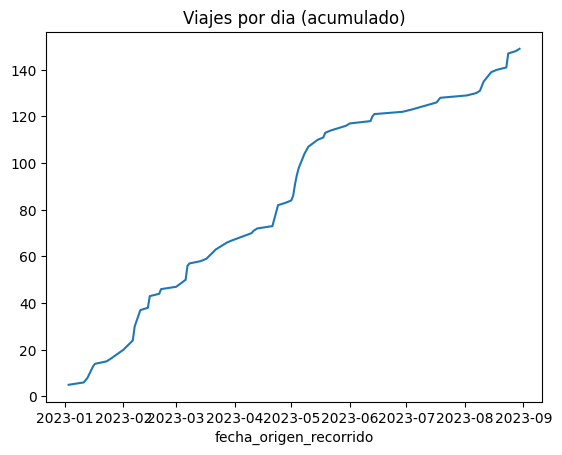

In [ ]:
viajes_por_dia.plot.line(title="Viajes por dia (acumulado)")

Comparar dos series: Nos permite mostrar la evolución de dos variables en conjunto.

In [ ]:
import numpy as np
df_tipos['duracion_recorrido'] = df_tipos['duracion_recorrido'].apply(lambda x: str(x).replace(",", "")).astype(float)
viajes_por_dia = df_tipos.groupby(df_tipos['fecha_origen_recorrido'].dt.date)['duracion_recorrido'].agg(['size', np.sum])
viajes_por_dia

<ipython-input-78-d47fd0dbfc94>:3: FutureWarning: The provided callable <function sum at 0x7e5cc9984670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  viajes_por_dia = df_tipos.groupby(df_tipos['fecha_origen_recorrido'].dt.date)['duracion_recorrido'].agg(['size', np.sum])


,size,sum
fecha_origen_recorrido,,
2023-01-03,5,5683.0
2023-01-11,1,1756.0
2023-01-13,2,1455.0
2023-01-16,5,4906.0
2023-01-17,1,714.0
...,...,...
2023-08-18,1,810.0
2023-08-23,1,374.0
2023-08-24,6,8395.0


<Axes: title={'center': 'Viajes por dia'}, xlabel='fecha_origen_recorrido'>

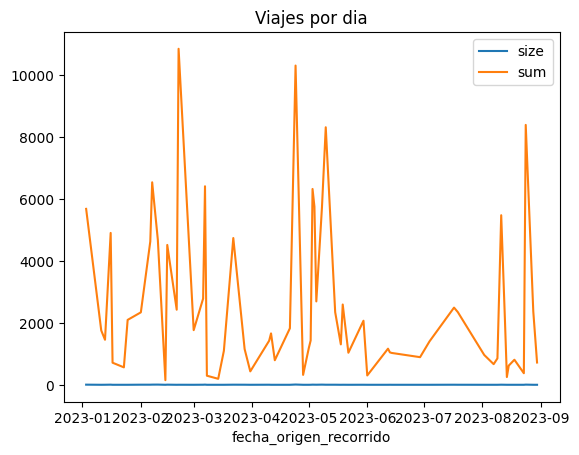

In [ ]:
viajes_por_dia.plot.line(title="Viajes por dia", )

Los datos estan en diferentes escalas! Por eso el segundo dato nos queda "aplanado" al cero. Una opción puede ser utilizar la escala logaritmica en el eje de las Y.

<Axes: title={'center': 'Viajes por dia'}, xlabel='fecha_origen_recorrido'>

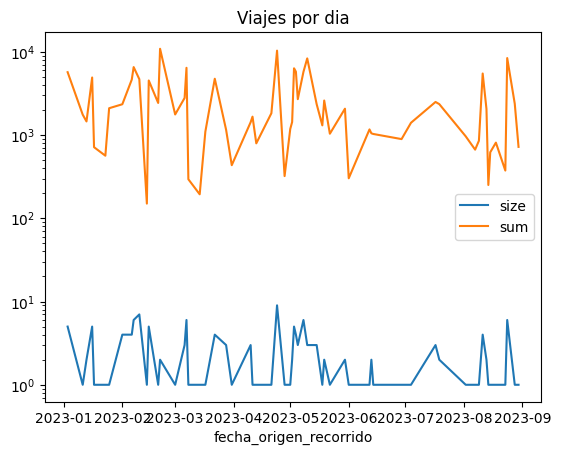

In [ ]:
viajes_por_dia.plot.line(title="Viajes por dia", logy=True)

## Graficos de Caja y bigote (boxplot)


Cuando estamos interesados en visualizar la _dispersión_ de una variable, es normal utilizar un grafico de caja y bigote, tambien llamado _boxplot_.

Llamamos dispersión de una variable a cuanto los datos se alejan de su mediana.

En este tipo de grafico, vemos cuales son los valores tipicos de las variables y cuales son sus valores atipicos. Lo normal es utilizarla para observar la dispersión de una variable continua, respecto de una variable categorica.

Como ejemplo, veamos la dispersión de la variable `duracion_recorrido`

<Axes: >

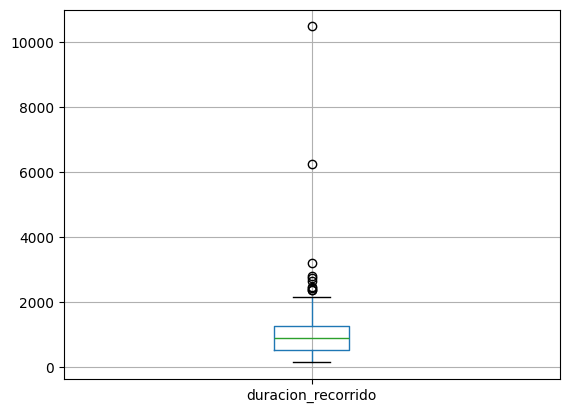

In [ ]:
df_tipos.boxplot("duracion_recorrido")

También podemos utilizarlo para comparar si la dispersión cambia respecto de alguna variable categórica. Por ejemplo

<Axes: title={'center': 'duracion_recorrido'}, xlabel='género'>

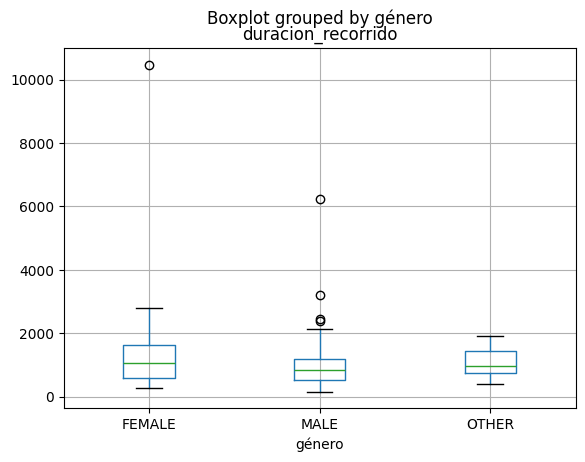

In [ ]:
df_tipos.boxplot("duracion_recorrido", by='género')

## Grafico de torta

Sirve para ver porcentajes.

Se utilizan en aquellos casos donde interesa no mostrar el número de veces que ocurre una variable categorica, si no que interesa visualizar mejor la proporción en que aparece esa característica respecto del total.

A pesar de su popularidad, se trata de un tipo de gráfico poco recomendable debido a que nuestra capacidad perceptual para estimar relaciones de proporción o diferencias entre áreas de sectores circulares es mucho menor que, por ejemplo, entre longitudes o posiciones, tal y como sucede en otras gráficas.



<Axes: ylabel='Id_recorrido'>

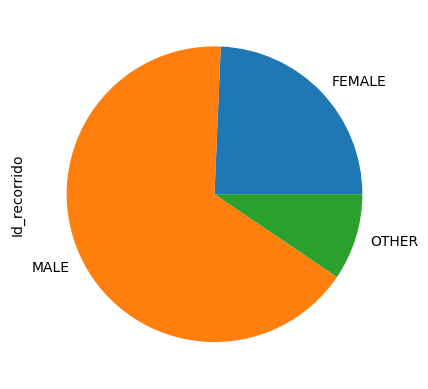

In [ ]:
df_tipos.groupby('género').count()['Id_recorrido'].plot.pie()

## Grafico de barras

Un  gráfico de barras es una forma de representar gráficamente un conjunto de datos o valores mediante barras rectangulares de longitud proporcional a los valores representados. Los gráficos de barras pueden ser usados para comparar cantidades de una variable en diferentes momentos o diferentes variables para el mismo momento. Las barras pueden orientarse horizontal y verticalmente.



<Axes: xlabel='género'>

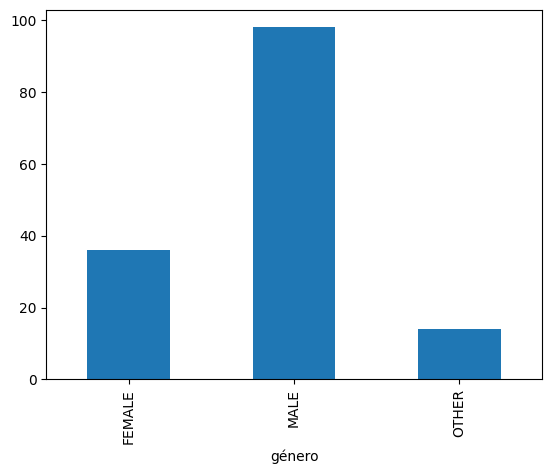

In [ ]:
df_tipos.groupby('género').count()['Id_recorrido'].plot.bar()

<Axes: ylabel='género'>

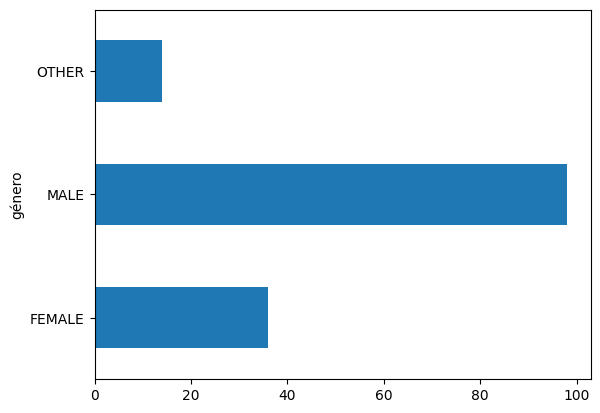

In [ ]:
df_tipos.groupby('género').count()['Id_recorrido'].plot.barh()